In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.special import exp1,factorial
from scipy.stats import binom,nbinom
from scipy.special import gammaln

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
plt.rcParams['font.family']='Arial'
plt.rcParams['axes.labelsize'] = 8    
plt.rcParams['axes.titlesize'] = 9    
plt.rcParams['xtick.labelsize'] = 8   
plt.rcParams['ytick.labelsize'] = 8 
plt.rcParams['legend.fontsize'] = 8

In [3]:
### Functions for theory

def get_lc(sigma,s):
    return np.sqrt(sigma**2/s)

def get_lambda_theory(w,sigma,s):
    lc = get_lc(sigma,s)
    term = (w / lc) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (4*np.pi)/prod_term

def get_EP_theory(mu, s):
    return mu / s

def get_EPsquared_theory(mu, s, rho, sigma, w):
    lcs = get_lc(sigma, s)**2
    term = (w / np.sqrt(lcs)) ** 2
    if term <= 800:
        prod_term = np.exp(term) * exp1(term)
    else:
        prod_term = sum((factorial(k) / (-term)**k for k in range(7))) / term
    return (mu / (s ** 2 * rho * 4 * np.pi * lcs)) * prod_term + mu ** 2 / s ** 2

def get_sfs_theory(x,n,mu,s,rho,sigma,w):
    mean = get_EP_theory(mu,s)
    var = get_EPsquared_theory(mu,s,rho,sigma,w) - mean**2
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

def get_sfs_theory_unif(x,n,mu,s,N):
    mean = mu/s
    var = mu/(s*s*N)
    alpha = mean**2/var
    beta = mean/var
    return nbinom.pmf(x,alpha,beta/(beta+n))

In [4]:
def get_obs_dist(width,vartype,scale_factor,centers): # return counts: scale factor should be equal to prop_kept
    obs_dist_list = []
    if width is not None: # not uniform
        for center in centers: # average over centers
            sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs/chr1_{vartype}_{center}geo{width}_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
            sfs_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std']) # average over replicates
            obs_dist_temp = sfs_grouped['mean'] / scale_factor # scale to adjust for downsampling
            obs_dist_list.append(obs_dist_temp)
        obs_dist = np.mean(obs_dist_list,axis=0)
    else: # uniform
        sfs = pd.read_csv(f'../empirical/subsampling_SIR_v20250127/results/sfs/chr1_{vartype}_uniformgeo_nSIR10000_nSIRreps10.SIRsfs', sep=' ')
        sfs_grouped = sfs.groupby('OBS_N')['COUNT_SITES'].agg(['mean', 'std']) # average over replicates
        obs_dist = sfs_grouped['mean'] / scale_factor # scale to adjust for downsampling
    return obs_dist

In [19]:
# res = pd.read_csv('res1.csv')
# res

In [5]:
mu = 1.25e-8
maxval=10
n=10000
widths_data=['50000','100000','150000']#,None]
centers=['centerE9N9','centerE16N4','centerE6N4']
vartypes=['synonymous','missense','lof']


In [6]:
### Scale factors for y axis - from empiriaclplots_v20250217

len_syn = 1308.0216666666665
len_mis = 2616.043333333333
len_lof = 167.616

prop_kept_syn = 32320/247378
prop_kept_mis = 32320/505963
prop_kept_lof = 1

scale_factors=[prop_kept_syn, prop_kept_mis, 1]

In [7]:
sfs_data = pd.read_csv('sfs_binned_summary.csv')

In [8]:
sfs_data

,Variant_Type,Panel,Bin_Center,Binned_SFS,Binned_Std
0,synonymous,H,1.414214,19.513923,0.196042
1,synonymous,H,2.828427,4.282202,0.206784
2,synonymous,H,5.656854,3.647889,0.237968
3,synonymous,H,11.661904,2.049816,0.320769
4,synonymous,H,24.392622,1.163884,0.327609
...,...,...,...,...,...
163,lof,C,5.656854,0.571942,0.023813
164,lof,C,11.661904,0.241226,0.018186
165,lof,C,24.392622,0.169037,0.028117
166,lof,C,59.160798,0.114349,0.074369


In [9]:
res_df1 = pd.read_csv("res_w50_w100_w150_minx1_sigma500_rho7.5.csv")
res_df2 = pd.read_csv("res_w50_w100_w150_minx2_sigma500_rho7.5.csv")
res_df3 = pd.read_csv("res_w50_w100_w150_minx3_sigma500_rho7.5.csv")

In [10]:
res_df1

,sigma,rho,s,w,mu,logl
0,11.183673,4.285757,0.004924,multi,1.250000e-08,-862.205356
1,31.551020,1.377633,0.004924,multi,1.250000e-08,-901.019602
2,82.469388,0.306218,0.004924,multi,1.250000e-08,-948.049854
3,133.387755,0.153159,0.004924,multi,1.250000e-08,-965.370908
4,255.591837,0.153159,0.007017,multi,1.250000e-08,-2060.497718
...,...,...,...,...,...,...
99995,489.816327,7.346941,0.000100,multi,1.250000e-08,-325668.943762
99996,500.000000,7.193882,0.000100,multi,1.250000e-08,-325677.247035
99997,489.816327,7.500000,0.000100,multi,1.250000e-08,-325679.186170
99998,500.000000,7.346941,0.000100,multi,1.250000e-08,-325687.530750


In [11]:
res_df2

,sigma,rho,s,w,mu,logl
0,51.918367,0.153159,0.005878,multi,1.250000e-08,-132.120162
1,31.551020,0.306218,0.005878,multi,1.250000e-08,-139.947720
2,72.285714,0.153159,0.007017,multi,1.250000e-08,-167.501567
3,489.816327,0.000100,0.000203,multi,1.250000e-08,-176.431207
4,1.000000,2.908224,0.007017,multi,1.250000e-08,-308.996990
...,...,...,...,...,...,...
99995,489.816327,7.346941,0.000100,multi,1.250000e-08,-171321.247571
99996,500.000000,7.193882,0.000100,multi,1.250000e-08,-171323.713402
99997,489.816327,7.500000,0.000100,multi,1.250000e-08,-171324.288775
99998,500.000000,7.346941,0.000100,multi,1.250000e-08,-171326.766960


In [12]:
res_df3

,sigma,rho,s,w,mu,logl
0,62.102041,0.153159,0.005878,multi,1.250000e-08,-80.768476
1,72.285714,0.153159,0.005878,multi,1.250000e-08,-81.288942
2,31.551020,0.459278,0.005878,multi,1.250000e-08,-83.010474
3,72.285714,0.153159,0.007017,multi,1.250000e-08,-87.829613
4,82.469388,0.153159,0.005878,multi,1.250000e-08,-89.104379
...,...,...,...,...,...,...
99995,123.204082,0.306218,0.000100,multi,1.250000e-08,-79626.516911
99996,62.102041,1.071514,0.000100,multi,1.250000e-08,-79630.429515
99997,194.489796,0.153159,0.000100,multi,1.250000e-08,-79652.213702
99998,102.836735,0.459278,0.000100,multi,1.250000e-08,-79656.869794


In [13]:
lof_min1 = pd.read_csv('lof_min1.csv')
lof_min2 = pd.read_csv('lof_min2.csv')
lof_min3 = pd.read_csv('lof_min3.csv')

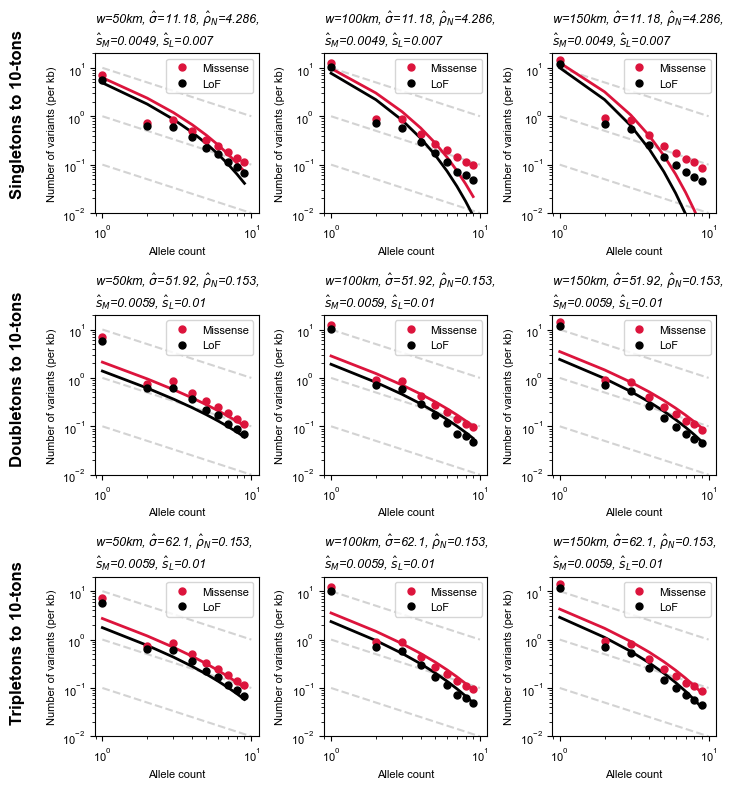

In [16]:
colors = ['#DC143C','black']#['orchid', 'darkorange']
widths_theory = [50, 100, 150]#, 500]
Lscale = [len_syn, len_mis, len_lof]
x = np.logspace(0, 1)
y = x**-1
vt_cap = ['Missense','LoF']
vartypes=['missense','lof']
fig, ax = plt.subplots(3, 3, figsize=(7.01, 8))
titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
for k in range(3):
    fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')

rho_vals = [res_df1.iloc[0]['rho'],res_df2.iloc[0]['rho'],res_df3.iloc[0]['rho']]
sig_vals = [res_df1.iloc[0]['sigma'],res_df2.iloc[0]['sigma'],res_df3.iloc[0]['sigma']]
s_vals = [res_df1.iloc[0]['s'],res_df2.iloc[0]['s'],res_df3.iloc[0]['s']]
# s_lof_vals = [0.007017,0.010000,0.010000]
s_lof_vals=[lof_min1.iloc[0]['s'],lof_min2.iloc[0]['s'],lof_min3.iloc[0]['s']]
for k in [0,1,2]:
    rho = rho_vals[k]
    sigma = sig_vals[k]
    s = s_vals[k]
    s_lof = s_lof_vals[k]
    for i in [0, 1,2]:
        ax[k,i].loglog(x, y, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y * 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 50, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y * 100, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 100, color='lightgray', linestyle='--')
        ax[k,i].loglog(x, y / 10, color='lightgray', linestyle='--')
        # ax[k,i].loglog(x, y / 50, color='lightgray', linestyle='--')
    
    for j, w in enumerate(widths_theory):
        nb_dist = [get_sfs_theory(y, n, mu, s, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[0])
        nb_dist_lof = [get_sfs_theory(y, n, mu, s_lof, rho, sigma, w) * 1000 for y in np.arange(0, maxval)] # plot per kb
        ax[k,j].loglog(np.arange(1, maxval), nb_dist_lof[1:], marker=None, linestyle='-', linewidth=2, alpha=1, color=colors[1])


    
    for j, wid in enumerate(widths_data):
        for i, vt in enumerate(vartypes):
            sfs = get_obs_dist(wid, vt, scale_factors[i], centers=centers)
            sfs_kb = [x / Lscale[i] for x in sfs] # plot per kb
            ax[k,j].loglog(np.arange(1, maxval), sfs_kb[1:maxval], marker='o', markersize=5, markeredgecolor=None,alpha=1,color=colors[i], linestyle='', label=vt_cap[i])
    
    for i in [0, 1, 2]:
        ax[k,i].set_ylim(1e-2, 2e1)
        ax[k,i].legend(frameon=True, loc = 'upper right')
    
    ax[k,0].set_title(f'w=50km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                   fontstyle='italic', loc='left')
    ax[k,1].set_title(f'w=100km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')
    ax[k,2].set_title(f'w=150km, $\\hat{{\\sigma}}$={round(sigma,2)}, $\\hat{{\\rho}}_N$={round(rho,3)},\n$\\hat{{s}}_M$={round(s,4)}, $\\hat{{s}}_L$={round(s_lof,4)}', 
                       fontstyle='italic', loc='left')

    
    # plt.show()
    for i in [0,1,2]:
        ax[k,i].set_xlabel("Allele count")
        ax[k,i].set_ylabel("Number of variants (per kb)")
        

plt.tight_layout()
plt.savefig('theory_data_fit_3by3_v5.pdf', bbox_inches='tight')
plt.show()


In [17]:
rho_vals

[4.285757142857142, 0.1531591836734693, 0.1531591836734693]

In [18]:
sig_vals

[11.183673469387756, 51.91836734693878, 62.102040816326536]

In [17]:
# titles = ['Singletons to 10-tons','Doubletons to 10-tons','Tripletons to 10-tons']
# # res_df1 = pd.read_csv("res3.csv")
# # res_df2 = pd.read_csv("res_w50_w100_w150_minx2.csv")
# # res_df3 = pd.read_csv("res_w50_w100_w150_minx3.csv")
# fig,ax = plt.subplots(3,2,figsize=(7.01,8))
# for i,res_df in enumerate([res_df1,res_df2,res_df3]):
#     sig_star = res_df.iloc[0]['sigma']
#     rho_star = res_df.iloc[0]['rho']
#     res_df['rho'] = res_df['rho'].round(2)
#     res_df['sigma'] = res_df['sigma'].round(2)
#     filtered_data = res_df.loc[res_df.groupby(['sigma', 'rho'])['logl'].idxmax()]
    
#     # Prepare the grid for heatmap and contour plot
#     rho_vals = np.unique(filtered_data['rho'])
#     sigma_vals = np.unique(filtered_data['sigma'])
    
#     # Create a meshgrid for the plot
#     Sigma, Rho = np.meshgrid(sigma_vals, rho_vals)  # Ensure correct order here
#     LogL = filtered_data.pivot(index='rho', columns='sigma', values='logl').values
    
#     # Define contour levels
#     logl_min = LogL.min()
#     logl_max = LogL.max()
#     contour_levels = np.linspace(logl_min, logl_max, 20)
    
    
    
#     # Plot heatmap using pcolormesh
#     heatmap = ax[i,0].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
#     cbar = fig.colorbar(heatmap, label='Log Likelihood',ax=ax[i,0])
#     # cbar.ax.tick_params(rotation=45)
#     # Plot contour lines on top of the heatmap
#     contours = ax[i,0].contour(Sigma, Rho, LogL, levels=contour_levels, colors='black', linewidths=0.5)
    
#     ax[i,0].set_xlabel(r"$\sigma$")
#     ax[i,0].set_ylabel(r"$\rho_N$")
#     # plt.title('Log Likelihood Heatmap with Contours - Poisson')
#     ax[i,0].set_title(titles[i],fontstyle='italic',loc='left')
#     # Flip the y-axis (Rho) order
#     ax[i,0].invert_yaxis()
#     ax[i,0].scatter(sig_star,rho_star,marker='*',color='black')


#     ### zoom in
#     # Plot heatmap using pcolormesh
#     heatmap = ax[i,1].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
#     cbar = fig.colorbar(heatmap, label='Log Likelihood',ax=ax[i,1])
#     # cbar.ax.tick_params(rotation=45)
#     # Plot contour lines on top of the heatmap
#     # contours = ax[i,1].contour(Sigma, Rho, LogL, levels=contour_levels, colors='black', linewidths=0.5)
    
#     ax[i,1].set_xlabel(r"$\sigma$")
#     ax[i,1].set_ylabel(r"$\rho_N$")
#     # plt.title('Log Likelihood Heatmap with Contours - Poisson')
#     ax[i,1].set_title(titles[i],fontstyle='italic',loc='left')
#     # Flip the y-axis (Rho) order
#     ax[i,1].invert_yaxis()
#     ax[i,1].scatter(sig_star,rho_star,marker='*',color='black')
#     ax[i,1].set_xlim(0,100)
#     if i==0:
#         ax[i,1].set_ylim(5,0)
#     else:
#         ax[i,1].set_ylim(1,0)

#     # ax[i].contour(Sigma, Rho, LogL, levels=[logl_max - 2], colors='red', linewidths=2, linestyles='--')
#     # ax[i].contour(Sigma, Rho, LogL, levels=[logl_max - 10], colors='blue', linewidths=2, linestyles='--')

# plt.tight_layout()
# plt.savefig('likelihood_theorydata_v4.pdf')
# plt.show()

In [18]:
# lof_min1 = pd.read_csv('lof_min1.csv')
# lof_min2 = pd.read_csv('lof_min2.csv')
# lof_min3 = pd.read_csv('lof_min3.csv')

In [19]:
lof_min2.iloc[0]['s']

0.01

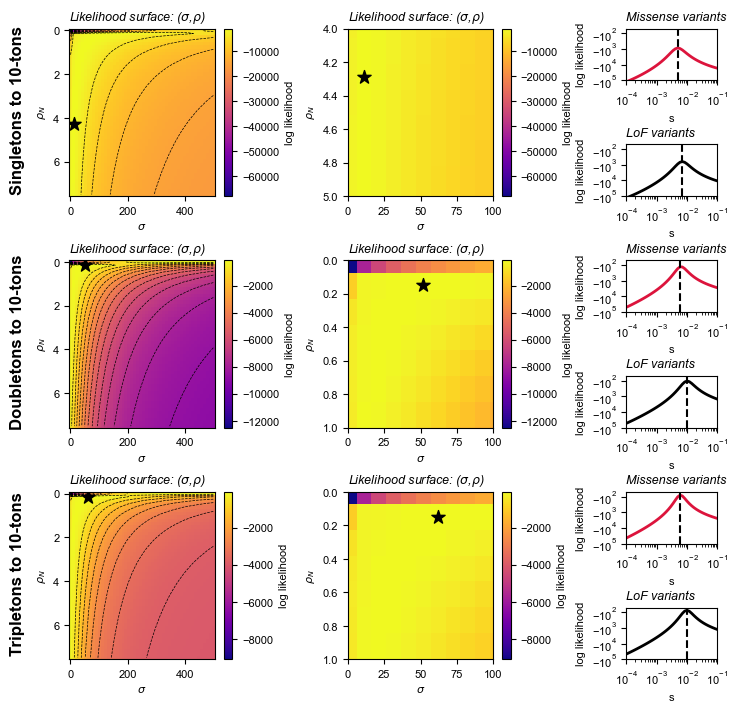

In [29]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(7.01, 7.01))
gs = fig.add_gridspec(6, 3, height_ratios=[1, 1, 1, 1, 1, 1],width_ratios=[1,1,0.5])  # Adjust the row height ratios

for k in range(3):
    fig.text(-0.02, 0.85 - k * 0.33, titles[k], fontsize=12, fontweight='bold', rotation=90, va='center', ha='center')


# Creating the main axes for the first two columns (1 plot per row, each spanning 2 rows)
ax = [fig.add_subplot(gs[i:i+2, 0]) for i in range(0, 6, 2)]  # Left column (spanning 2 rows)
ax.extend([fig.add_subplot(gs[i:i+2, 1]) for i in range(0, 6, 2)])  # Middle column (spanning 2 rows)

# Creating the third column with two plots per row (top and bottom in each row)
# Assign two distinct subplots per row in the third column
ax.append(fig.add_subplot(gs[0, 2]))  # Top plot in third column (1st row)
ax.append(fig.add_subplot(gs[1, 2]))  # Bottom plot in third column (1st row)

ax.append(fig.add_subplot(gs[2, 2]))  # Top plot in third column (2nd row)
ax.append(fig.add_subplot(gs[3, 2]))  # Bottom plot in third column (2nd row)

ax.append(fig.add_subplot(gs[4, 2]))  # Top plot in third column (3rd row)
ax.append(fig.add_subplot(gs[5, 2]))  # Bottom plot in third column (3rd row)

# Your data
titles = ['Singletons to 10-tons', 'Doubletons to 10-tons', 'Tripletons to 10-tons']
# res_df1 = pd.read_csv("res3.csv")
# res_df2 = pd.read_csv("res_w50_w100_w150_minx2.csv")
# res_df3 = pd.read_csv("res_w50_w100_w150_minx3.csv")

for i, res_df in enumerate([res_df1, res_df2, res_df3]):
    sig_star = res_df.iloc[0]['sigma']
    rho_star = res_df.iloc[0]['rho']
    res_df['rho'] = res_df['rho'].round(2)
    res_df['sigma'] = res_df['sigma'].round(2)
    filtered_data = res_df.loc[res_df.groupby(['sigma', 'rho'])['logl'].idxmax()]

    rho_vals = np.unique(filtered_data['rho'])
    sigma_vals = np.unique(filtered_data['sigma'])

    Sigma, Rho = np.meshgrid(sigma_vals, rho_vals)
    LogL = filtered_data.pivot(index='rho', columns='sigma', values='logl').values

    logl_min = LogL.min()
    logl_max = LogL.max()
    contour_levels = np.linspace(logl_min, logl_max, 20)

    # Plot heatmap using pcolormesh for the first column (ax[i])
    heatmap = ax[i].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
    cbar = fig.colorbar(heatmap, label='log likelihood', ax=ax[i])
    contours = ax[i].contour(Sigma, Rho, LogL, levels=contour_levels, colors='black', linewidths=0.5)
    ax[i].set_xlabel(r"$\sigma$")
    ax[i].set_ylabel(r"$\rho_N$")
    ax[i].set_title(r'Likelihood surface: ($\sigma$,$\rho$)', fontstyle='italic', loc='left')
    ax[i].invert_yaxis()
    ax[i].scatter(sig_star, rho_star, marker='*', color='black',s=100)

    # Zoomed-in heatmap for the second column (ax[i + 3])
    heatmap = ax[i + 3].pcolormesh(Sigma, Rho, LogL, cmap="plasma", shading='auto')
    cbar = fig.colorbar(heatmap, label='log likelihood', ax=ax[i + 3])
    # contours = ax[i+3].contour(Sigma, Rho, LogL, levels=contour_levels, colors='gray', linewidths=0.5)
    ax[i + 3].set_xlabel(r"$\sigma$")
    ax[i + 3].set_ylabel(r"$\rho_N$")
    ax[i + 3].set_title(r'Likelihood surface: ($\sigma$,$\rho$)', fontstyle='italic', loc='left')
    ax[i + 3].invert_yaxis()
    ax[i + 3].scatter(sig_star, rho_star, marker='*', color='black',s=100)
    ax[i + 3].set_xlim(0, 100)
    if i == 0:
        ax[i + 3].set_ylim(5, 4)
    else:
        ax[i + 3].set_ylim(1, 0)


    # likelihood surface on s
    res_sub = res_df[(res_df['sigma']==sig_star)&(res_df['rho']==rho_star)]
    res_sub = res_sub.sort_values(by='s')
    ax[2*i+6].plot(res_sub['s'], 1*res_sub['logl'], marker=None, linestyle='-', linewidth=2,color=colors[0])
    ax[2*i+6].set_xscale('log')
    ax[2*i+6].set_yscale('symlog')
    # ax[2*i+6].set_yscale('symlog', linthresh=1e-10)  # Tiny linthresh removes the visible linear region
    ax[2*i+6].set_xlim(1e-4, 1e-1)
    ax[2*i+6].set_ylim(-1e5, -5e1)
    ax[2*i+6].axvline(x=s_vals[i],linewidth=1.5,color='black',linestyle='--')

    # ax[2*i+6].plot(res_sub['s'], -1*res_sub['logl'], marker=None, linestyle='-', linewidth=2)
    # ax[2*i+6].set_xscale('log')
    # ax[2*i+6].set_yscale('log')
    # ax[2*i+6].set_xlim(1e-4, 1e-1)
    lof_min_list = [lof_min1, lof_min2, lof_min3]

    lof_min_list[i] = lof_min_list[i].sort_values(by='s')  # Sort by 's'
    ax[2*i+7].plot(lof_min_list[i]['s'], 1 * lof_min_list[i]['logl'], marker=None, linestyle='-', linewidth=2,color=colors[1])
    ax[2*i+7].axvline(x=s_lof_vals[i],linewidth=1.5,color='black',linestyle='--')
    # if i==0:
    #     ax[2*i+7].plot(lof_min1['s'],-1*lof_min1['logl'], marker=None, linestyle='-', linewidth=2)
    # if i==1:
    #     ax[2*i+7].plot(lof_min2['s'],-1*lof_min2['logl'], marker=None, linestyle='-', linewidth=2)
    # if i==2:
    #     ax[2*i+7].plot(lof_min3['s'],-1*lof_min3['logl'], marker=None, linestyle='-', linewidth=2)

    ax[2*i+7].set_xscale('log')
    ax[2*i+7].set_xlim(1e-4,1e-1)
    ax[2*i+7].set_ylim(-1e5, -5e1)
    ax[2*i+7].set_yscale('symlog')
    
    ax[2*i+6].set_ylabel('log likelihood')
    ax[2*i+7].set_ylabel('log likelihood')
    ax[2*i+6].set_xlabel('s')
    ax[2*i+7].set_xlabel('s')
    ax[2*i+6].set_xlim(1e-4,1e-1)
    ax[2*i+6].set_title('Missense variants',loc='left',fontstyle='italic')
    ax[2*i+7].set_title('LoF variants',loc='left',fontstyle='italic')
        
# ax[6].set_title('test')

# Adjust layout for the new grid configuration
plt.tight_layout(pad=0.3)
plt.savefig('likelihood_theorydata_v6.pdf', bbox_inches='tight')
plt.show()


In [123]:
res_df3[(res_df3['sigma']==sig_star)&(res_df3['rho']==rho_star)]

,sigma,rho,s,w,mu,logl
0,51.92,0.2,0.006210,multi,1.250000e-08,-80.932037
5,51.92,0.2,0.005298,multi,1.250000e-08,-90.614951
15,51.92,0.2,0.007279,multi,1.250000e-08,-97.300622
63,51.92,0.2,0.004520,multi,1.250000e-08,-130.008693
72,51.92,0.2,0.008532,multi,1.250000e-08,-136.607977
266,51.92,0.2,0.010000,multi,1.250000e-08,-196.221121
295,51.92,0.2,0.003857,multi,1.250000e-08,-203.396980
698,51.92,0.2,0.003290,multi,1.250000e-08,-315.778183
1150,51.92,0.2,0.002807,multi,1.250000e-08,-472.969755
1815,51.92,0.2,0.002395,multi,1.250000e-08,-681.728703
